In [16]:
import numpy as np
import matplotlib.pyplot as plt
path = "G:\\My Drive\\uni\\Machine Learning intro\\Introduction-To-Machine-Learning\\ex3\\mnist_all.npz"
np.set_printoptions(threshold=np.inf)
data = np.load(path)

In [17]:
def get_random_samples(digit, m):
    X = data[f'train{digit}']
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    samples = X[indices][:m]
    labels = np.full((m, 1), digit)
    return samples, labels


def get_small_sample(samples_per_digit):
    # make dictionary smaller sample from data
    X = {f"train{i}": get_random_samples(i, samples_per_digit)[
        0] for i in range(10)}
    return X


def cluster_dist(c1, c2):
    return np.array([np.linalg.norm(x1 - x2) for x1 in c1 for x2 in c2]).min()


def singlelinkage(X, k):
    """
    :param X: numpy array of size (m, d) containing the test samples
    :param k: the number of clusters
    :return: a column vector of length m, where C(i) ∈ {1, . . . , k} is the identity of the cluster in which x_i has been assigned.
    """
    m, d = X.shape
    clusters = [np.array([i]) for i in range(m)]
    while len(clusters) > k:
        distances = np.array([[cluster_dist(clusters[i], clusters[j])
                               for j in range(len(clusters))] for i in range(len(clusters))])
        np.fill_diagonal(distances, np.inf)
        min_i, min_j = np.unravel_index(np.argmin(distances), distances.shape)
        clusters[min_i] = np.concatenate((clusters[min_i], clusters[min_j]))
        clusters.pop(min_j)
    res = np.zeros((m, 1))
    for i, c in enumerate(clusters):
        for x_index in c:
            res[x_index] = i
    return res
                


for each cluster: <br>
(1)what is its size <br>
(2) which label is most common in it, and <br>
(3) what percentage of the points in the cluster have this label.<br>
Report the classification error on the sample, that would result if we classified all the points in each cluster using the cluster’s most common label.<br>
Explain your calculation.<br>

In [18]:
def make_table(data, cols, rows):
    fig, ax = plt.subplots(figsize=(12, 2))
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=data, colLabels=cols, rowLabels=rows, cellLoc = 'center', loc='center')
    plt.show()

In [19]:
def analyze_single_linkage_unlabeld():
    X = np.concatenate([data[f'train{i}'] for i in range(10)])
    Y = np.concatenate([np.full((data[f'train{i}'].shape[0], 1), i) for i in range(10)])
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    samples = np.array(X[indices][:300])
    labels = Y[indices][:300]

    single_linkage_res = singlelinkage(samples, 10)
    clusters = np.empty((10,), dtype=object)
    for i in range(10):
        indices = np.where(single_linkage_res == i)[0]
        clusters[i] = indices

    clsuters_size = np.array([len(cluster) for cluster in clusters])

    real_labels_per_cluster = [[labels[i]
                                for i in cluster] for cluster in clusters]
    most_common_label_in_cluster = []
    for real_labels in real_labels_per_cluster:
        if len(real_labels) > 0:
            most_common_label_in_cluster.append(
                max(real_labels, key=real_labels.count))
        else:
            most_common_label_in_cluster.append(-1)
    
    precent_of_most_common_label_in_cluster = [real_labels.count(most_common_label_in_cluster[i]) / clsuters_size[i] for i,real_labels in enumerate(real_labels_per_cluster)]
    # format the precent to 4 digits after the dot
    precent_of_most_common_label_in_cluster = [f'{precent:.4f}' for precent in precent_of_most_common_label_in_cluster]
    errors = []
    for i in range(10):
        if clsuters_size[i] == 0:
            errors.append(0)
        else:
            errors.append(np.mean((np.array([most_common_label_in_cluster[i] for _ in range(
                clsuters_size[i])]).reshape(-1, 1)) != real_labels_per_cluster[i]))

    table = [clsuters_size, most_common_label_in_cluster, precent_of_most_common_label_in_cluster, errors]
    return table   

In [20]:
table_data = analyze_single_linkage_unlabeld()


In [24]:
new_table_data = table_data.copy()
new_table_data[1] = np.array(table_data[1]).T
new_table_data[3] = np.array([f'{error:.4f}' for error in table_data[3]])
new_table_data

[array([291,   1,   1,   1,   1,   1,   1,   1,   1,   1]),
 array([[3, 5, 5, 3, 4, 0, 2, 4, 2, 3]]),
 ['0.1615',
  '1.0000',
  '1.0000',
  '1.0000',
  '1.0000',
  '1.0000',
  '1.0000',
  '1.0000',
  '1.0000',
  '1.0000'],
 array(['0.8385', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000',
        '0.0000', '0.0000', '0.0000', '0.0000'], dtype='<U6')]

In [25]:
table = np.vstack(new_table_data)

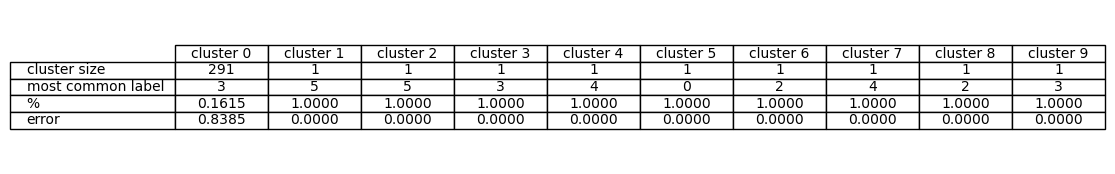

In [26]:
row_headers = ["cluster size", "most common label", "%", "error"]
col_headers = np.array([f"cluster {i}" for i in range(10)])
make_table(table, col_headers, row_headers)